In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cmdstanpy import CmdStanModel
from random import shuffle
from scipy import stats

In [2]:
def exercise1(data, rows, cols, bins=None):
    if bins is None:
        bins = [15]*(rows*cols)
    fig, axes = plt.subplots(rows, cols)
    for index, series in enumerate(data):
        row = int(index / cols)
        col = index % cols
        axes[row, col].plot(data[series])
    plt.show()

    fig, axes = plt.subplots(rows, cols)
    for index, series in enumerate(data):
        row = int(index / cols)
        col = index % cols
        axes[row, col].hist(data[series], bins=bins[index])
    plt.show()

    fig, axes = plt.subplots(rows, cols)
    for index, series in enumerate(data):
        row = int(index / cols)
        col = index % cols
        kde = stats.gaussian_kde(data[series])
        minimum = data[series].min()
        maximum = data[series].max()
        points = np.linspace(minimum, maximum, 200)
        axes[row, col].plot(kde(points=points))
    plt.show()

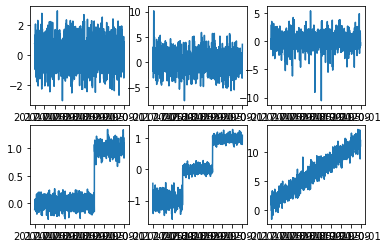

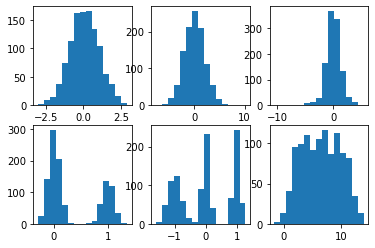

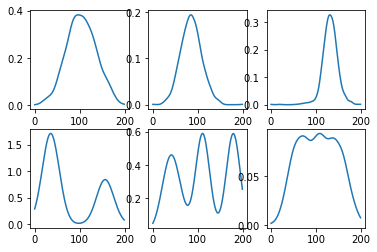

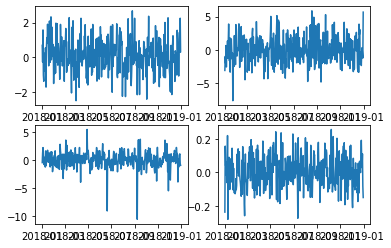

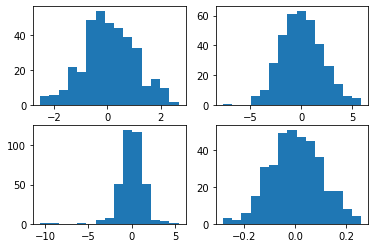

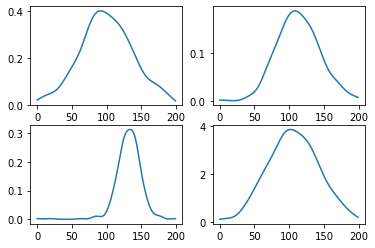

In [7]:
data = pd.read_csv('Data1.csv', index_col=0)
data.index = pd.to_datetime(data.index)
exercise1(data, 2, 3)
data_2018 = data[data.index.year == 2018]
data_2018_1_to_4 = data_2018[['theta_1', 'theta_2', 'theta_3', 'theta_4']]
exercise1(data_2018_1_to_4, 2, 2)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


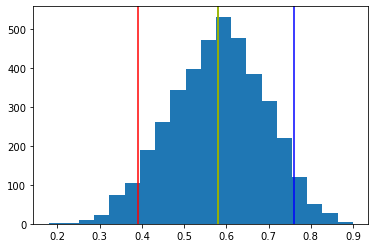

In [12]:
stan_y = [0]*7 + [1]*10
shuffle(stan_y)
stan_data = {'N': 17,
             'y': stan_y}
model = CmdStanModel(stan_file='bern_1.stan')
sample = model.sample(stan_data)
theta = sample.stan_variable('theta')
summary = sample.summary()
plt.hist(theta, bins=20)
plt.axvline(summary['5%']['theta'], color='r')
plt.axvline(summary['50%']['theta'], color='g')
plt.axvline(summary['95%']['theta'], color='b')
plt.axvline(theta.mean(), color='y')
plt.show()